In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib.gridspec import GridSpec

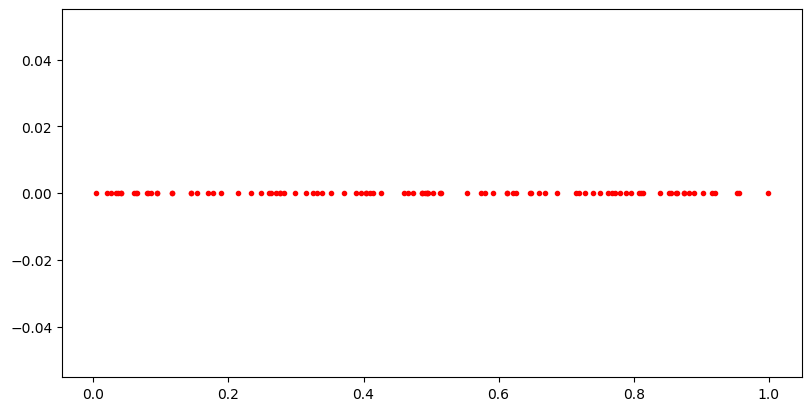

In [2]:
nx = 100
x = np.random.rand(nx)

fig = plt.figure(figsize=(8,4), dpi=100, facecolor='w', edgecolor='k',constrained_layout=True)
ax = fig.add_subplot(111)
ax.plot(x,nx*[0],'.r')
plt.show()
# plt.savefig('random_numbers.png',dpi=200,format='png')

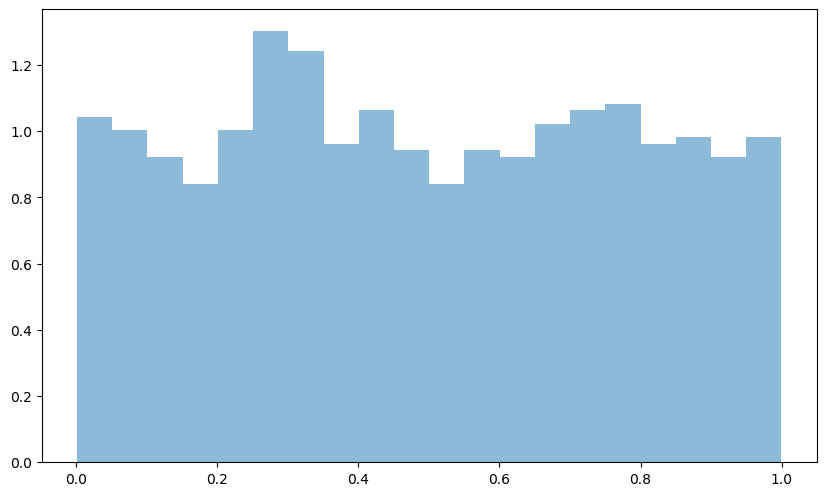

In [4]:
nx = 1000
x = np.random.rand(nx)

fig=plt.figure(figsize=(10,6), dpi=100, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.hist(x,bins=20, density=True, histtype='stepfilled', alpha=0.5)
plt.show()
# plt.savefig('histogram.png',dpi=200,format='png')

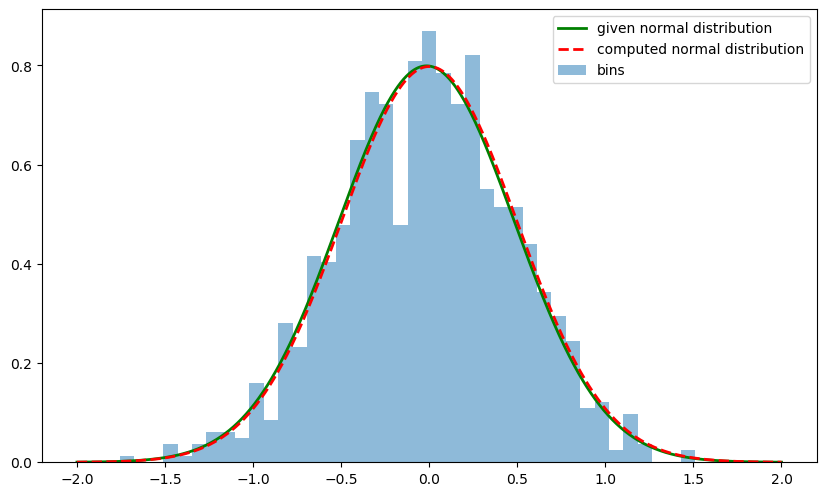

In [6]:
# normal distribution with Box-Muller transformation
mu = 0.0
sigma = 0.5
bins = np.linspace(mu-2,mu+2,50)

nx = 1000
u1 = np.random.rand(nx)
u2 = np.random.rand(nx)
z1 = np.sqrt(-2.0*np.log(u1))*np.cos(2.0*np.pi*u2)
z2 = np.sqrt(-2.0*np.log(u1))*np.sin(2.0*np.pi*u2)

y1 = mu + sigma * z1
x_ana = np.linspace(mu-2,mu+2,nx)
y_ana = 1.0/(np.sqrt(2.0*np.pi*sigma**2))*np.exp(-(x_ana-mu)**2/(2.0*sigma**2))

mu_comp = np.mean(y1)
sigma_comp = np.nanstd(y1)
y_comp = 1.0/(np.sqrt(2.0*np.pi*sigma_comp**2))*np.exp(-(x_ana-mu_comp)**2/(2.0*sigma_comp**2))

fig=plt.figure(figsize=(10,6), dpi=100, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.hist(y1, bins=bins,density=True, histtype='stepfilled', alpha=0.5,label='bins')
ax.plot(x_ana,y_comp,'-g',lw=2,label='given normal distribution')
ax.plot(x_ana,y_ana,'--r',lw=2,label='computed normal distribution')
plt.legend()
plt.show()
# plt.savefig('normal_distributed_random_numbers.png',dpi=200,format='png')

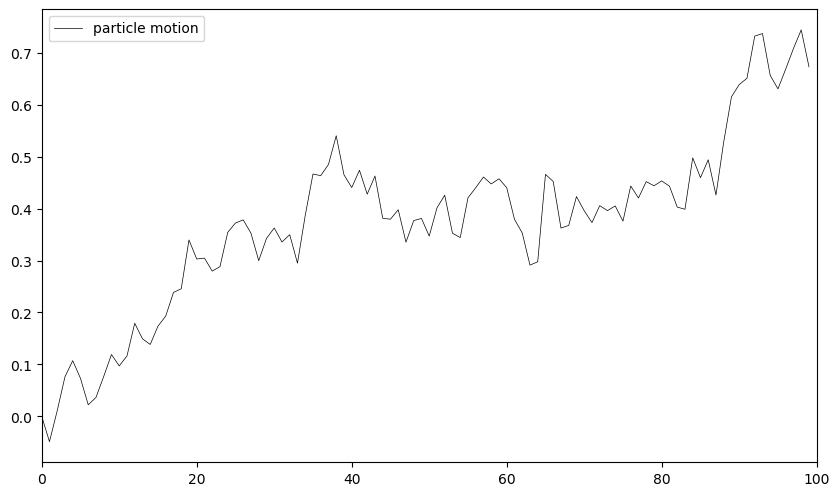

In [7]:
nx = 100
mu = 0.0
sigma = 0.05

x = range(nx)

u1 = np.random.rand(nx)
u2 = np.random.rand(nx)
z1 = np.sqrt(-2.0*np.log(u1))*np.cos(2.0*np.pi*u2)
z2 = np.sqrt(-2.0*np.log(u1))*np.sin(2.0*np.pi*u2)

y1 = mu + sigma * z1
y2 = np.cumsum(y1)-y1[0]

fig=plt.figure(figsize=(10,6), dpi=100, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.plot(x,y2,'-k',lw=0.5,label='particle motion')
ax.set_xlim([0,nx])
ax.legend(loc='upper left')
# plt.savefig('brownian_motion_single.png',dpi=200,format='png')
plt.show()

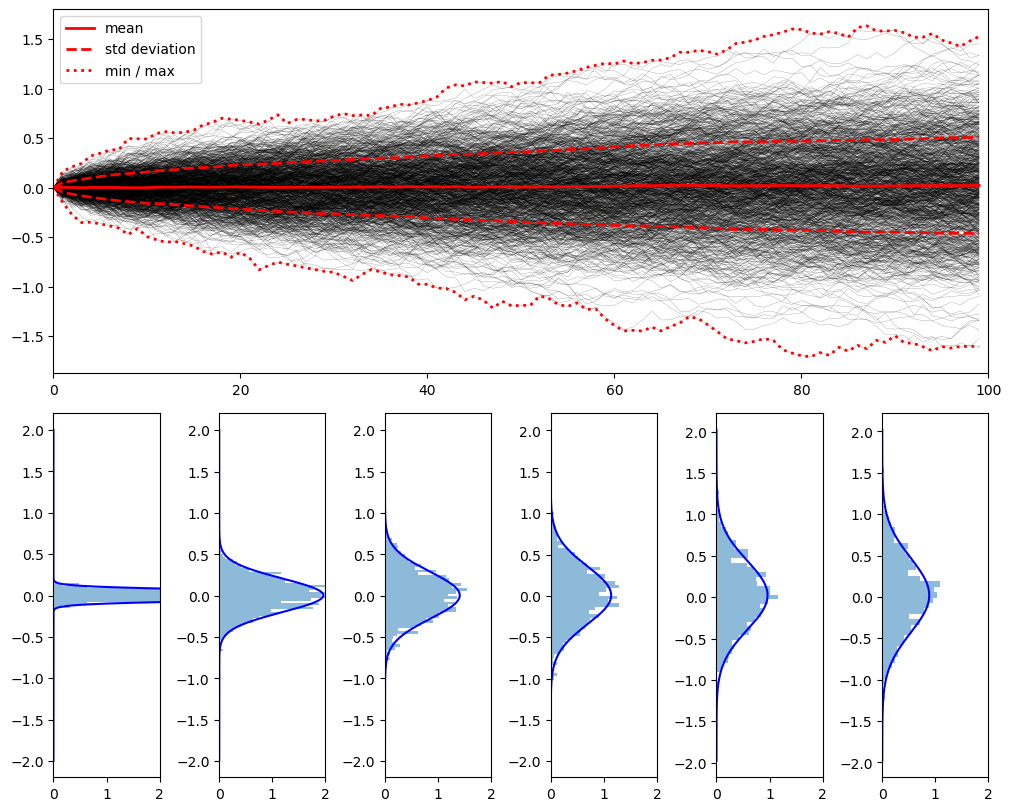

In [10]:
nx = 100
nt = 1000
mu = 0.0
sigma = 0.05

x = range(nx)
Y = np.zeros([nt,nx])

for it in range(nt):
    u1 = np.random.rand(nx)
    u2 = np.random.rand(nx)
    z1 = np.sqrt(-2.0*np.log(u1))*np.cos(2.0*np.pi*u2)
    z2 = np.sqrt(-2.0*np.log(u1))*np.sin(2.0*np.pi*u2)
    y1 = mu + sigma * z1
    Y[it,:] = np.cumsum(y1)-y1[0]

X = np.repeat(np.array([range(nx)]),nt,axis=0)

y_mean = np.mean(Y.T,axis=1)
y_std = np.nanstd(Y.T,axis=1)
y_min = np.min(Y.T,axis=1)
y_max = np.max(Y.T,axis=1)

nsec = 6
ind = np.arange(1,nx,int(nx/(nsec)))

fig = plt.figure(figsize=(10,8), dpi=100, facecolor='w', edgecolor='k',constrained_layout=True)
gs = GridSpec(2, nsec, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax1.plot(X.T,Y.T,'-k',lw=0.1)
ax1.plot(range(nx),y_mean,'r',lw=2,label='mean')
ax1.plot(range(nx),y_mean+1*y_std,'--r',lw=2,label='std deviation')
ax1.plot(range(nx),y_mean-1*y_std,'--r',lw=2)
ax1.plot(range(nx),y_min,':r',lw=2,label='min / max')
ax1.plot(range(nx),y_max,':r',lw=2)
ax1.set_xlim([0,nx])
ax1.legend(loc='upper left')

for isec in range(nsec):
    ax_ = fig.add_subplot(gs[1, isec])    
    y = Y[:,ind[isec]]
    mu_comp = np.mean(y)
    sigma_comp = np.nanstd(y)
    x_comp = np.linspace(mu_comp-2,mu_comp+2,1000)
    y_comp = 1.0/(np.sqrt(2.0*np.pi*sigma_comp**2))*np.exp(-(x_comp-mu_comp)**2/(2.0*sigma_comp**2))
    ax_.hist(y, bins=50,density=True,  histtype='stepfilled', alpha=0.5,orientation='horizontal')
    ax_.plot(y_comp,x_comp,'b')
    # ax_.set_xlim([0,np.max(y_comp)])
    ax_.set_xlim([0,2])

# plt.savefig('brownian_motion_multiple.png',dpi=200,format='png')
plt.show()
